## Import Packages

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## Load Data

In [0]:
digits = load_digits()

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
Dimension:  2
Size:  64


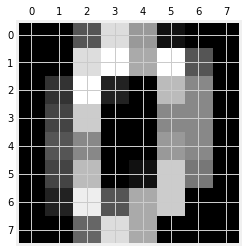

In [4]:
# Printing Images
a = digits.images[0]
plt.matshow(a)
plt.gray();
print(a)
print('Dimension: ', a.ndim)
print('Size: ', a.size)

In [5]:
# Printing Data
b = digits.data[0]
print(b)
print('Dimension: ', b.ndim)
print('Size: ', b.size)

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Dimension:  1
Size:  64


In [0]:
# Convert to Dataframes
x = pd.DataFrame(digits.data)
y = pd.DataFrame(digits.target)

In [0]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [8]:
# Testing Data
len(x_test)

360

## Random Forest

In [99]:
# Random Forest
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
# Accuracy
model.score(x_test, y_test)

0.975

In [101]:
# Confusion Matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 42,  0,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 30,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 37,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 24,  1],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 31]])

## Confusion Matrix

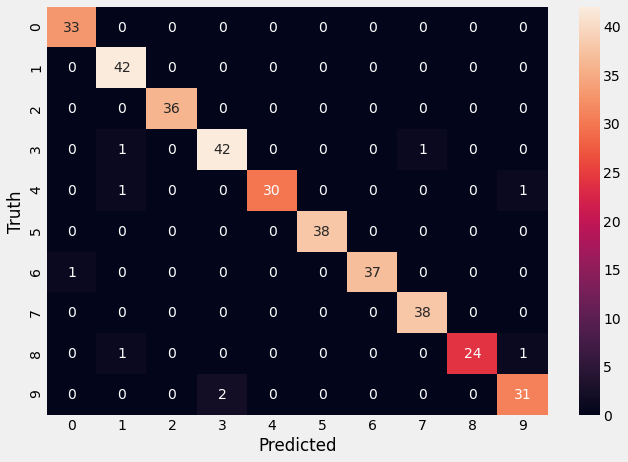

In [102]:
# Plot Predictions
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth');